In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [2]:
# Want to solve differential equation of the form: y'' = (x^2 - epsilon)y
# We can set this up as system of differential equations, where
# y_1 = y'
# y_2 = y''

# Then, our differential equation becomes the system
# y_1' = y_2
# y_2' = (x^2 - epsilon)y_1

# Defining the shooting algorithm using the system of differential
# equations defined above.

def shoot_algorithm(y, x, epsilon):
    return [y[1], ((x**2) - epsilon)*y[0]]

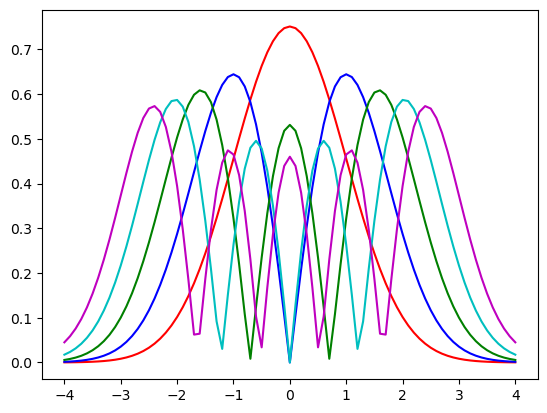

In [3]:
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm']
L = 4 

# Defining our interval of x-values
xspan = [-L, L]

# Defining our partition of our interval [-L, L]
x_partition = np.linspace(xspan[0], xspan[1], (xspan[1] - xspan[0]) * 10 + 1)

# Initializing our vector of eigenvalues and matrix of eigenvectors
epsilon_vector = np.zeros(5)
solution_vector = np.zeros((81, 5))

epsilon_start = 0.1

# Inner for-loop finding each of the 5 modes
for modes in range(1,6):
    epsilon = epsilon_start
    d_epsilon = 0.01
    # Inner-for loop finding epsilon for each mode
    for i in range(1000):
        phi0 = [1, np.sqrt(L**2 - epsilon)]
        phi = odeint(shoot_algorithm, phi0, x_partition, args = (epsilon,))
        if abs(phi[-1, 1] + np.sqrt(L**2 - epsilon) * phi[-1,0]) < tol:
            epsilon_vector[modes - 1] = epsilon
            break
        if (-1)**(modes + 1) * (phi[-1,1] + np.sqrt(L**2 - epsilon) * phi[-1,0]) > 0:
            epsilon += d_epsilon
        else:
            epsilon -= d_epsilon / 2
            d_epsilon /= 2
    epsilon_start = epsilon + 0.1
    norm = np.trapz(phi[:, 0] * phi[:, 0], x_partition)
    solution_vector[:, (modes - 1)] = abs(phi[:, 0] / np.sqrt(norm))
    plt.plot(x_partition, abs(phi[:, 0] / np.sqrt(norm)), col[modes - 1])
plt.show()

In [6]:
A1 = solution_vector
A2 = epsilon_vector

print(A1)
print(A2)

[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588474e-02
  4.50516513e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399840e-02
  5.86293602e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583004e-02
  7.58483847e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281006e-02
  9.71898922e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048290e-02
  1.23080881e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653853e-02
  1.53831211e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795048e-02
  1.89559826e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171081e-01
  2.30113205e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069152e-01
  2.74981511e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649426e-01
  3.23220494e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868658e-01
  3.73389527e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395934e-01
  4.23517920e-01]
 [1.49032591e-02 5.90146385e-02 1.547089